In [202]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,roc_auc_score, roc_curve, auc, precision_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
fileloc = "D:\\Learning\\GreyAtom\\Hackathon 2\\Data\\"
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import scipy.

In [203]:
def readTrainData():
    print("Reading csv...\n")
    df = pd.read_csv(fileloc+'Train_file.csv')
    print("Reading csv Completed...\n\n")
    return df

def readTestData():
    print("Reading csv...\n")
    df = pd.read_csv(fileloc+'Test_file.csv')
    print("Reading csv Completed...\n\n")
    return df

# Profile Report

In [7]:
df = pd.read_csv(fileloc+'Train_file.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
ID                      62288 non-null int64
Age                     62288 non-null int64
Agency                  62288 non-null object
Agency Type             62288 non-null object
Commision (in value)    62288 non-null float64
Destination             62288 non-null object
Distribution Channel    62288 non-null object
Duration                62288 non-null int64
Gender                  22713 non-null object
Net Sales               62288 non-null float64
Product Name            62288 non-null object
Claim                   62288 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 5.7+ MB


In [205]:
Prod_Claim = df.pivot_table(index=['Product Name'], aggfunc={'Claim':sum}).fillna(0)
Prod_tc = df.pivot_table(index=['Product Name'], aggfunc={'Claim':len}).fillna(0)
Prod_tc.rename(columns={'Claim':'tc'})
fin = Prod_tc.join(Prod_Claim, how='inner', lsuffix='l').rename(columns={'Claiml':'tot'})
fin['Claim_Perc']=round(fin['Claim']/(fin['tot'])*100, 2)
fin.sort_values(by='Claim_Perc', ascending=False)

,tot,Claim,Claim_Perc
Product Name,,,
Annual Silver Plan,3143,2132,67.83
Annual Gold Plan,422,280,66.35
Annual Travel Protect Gold,198,123,62.12
Silver Plan,3646,1953,53.57
Single Trip Travel Protect Platinum,119,63,52.94
Spouse or Parents Comprehensive Plan,27,14,51.85
Gold Plan,513,246,47.95
Annual Travel Protect Silver,128,61,47.66
Bronze Plan,5884,2803,47.64


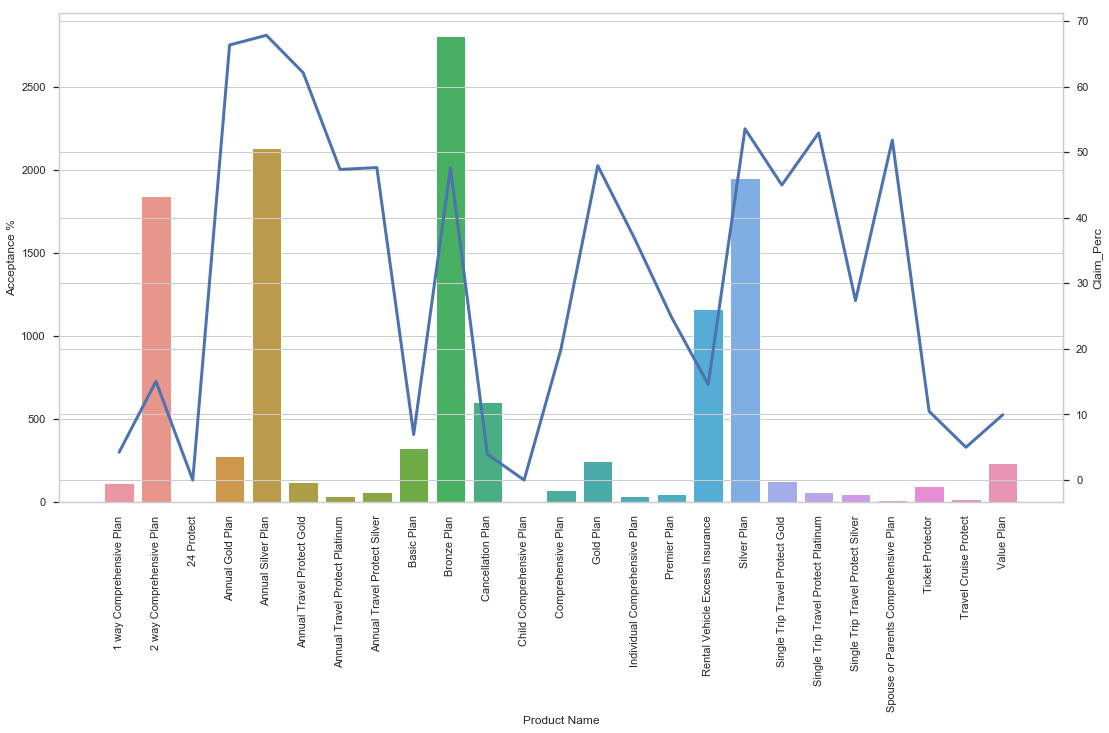

In [214]:
fig,ax1=plt.subplots(figsize=(18,9))
sns.barplot(fin.index,fin.Claim,ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(fin.index,fin['Claim_Perc'],ax=ax2,linewidth=3)

In [191]:
fin.columns

Index(['tot', 'Claim', 'Claim_Perc'], dtype='object')

In [29]:
DestinationWiseClaims = pd.crosstab(df.Destination, df.Claim)
DestinationWiseClaims['Claim_Perc']=round(DestinationWiseClaims[1]/(DestinationWiseClaims[0]+DestinationWiseClaims[1])*100,2)
DestinationWiseClaims.sort_values(by='Claim_Perc', ascending=False)

Claim,0,1,Claim_Perc
Destination,,,
COSTA RICA,4,12,75.00
ARGENTINA,15,12,44.44
SINGAPORE,10181,7615,42.79
CZECH REPUBLIC,54,28,34.15
SOUTH AFRICA,118,46,28.05
ICELAND,87,33,27.50
NEPAL,98,36,26.87
ISRAEL,31,11,26.19
SWITZERLAND,215,73,25.35


In [59]:
AgencyvsDest = pd.crosstab([df.Destination, df.Agency], df.Claim)
AgencyvsDest['Claim_Perc']=round(AgencyvsDest[1]/(AgencyvsDest[0]+AgencyvsDest[1])*100,2)
AgencyvsDest.sort_values(by='Claim_Perc', ascending=False)

,Claim,0,1,Claim_Perc
Destination,Agency,,,
ARGENTINA,CWT,1,12,92.31
SWITZERLAND,KML,2,15,88.24
FRANCE,LWC,7,32,82.05
COSTA RICA,EPX,3,12,80.00
"KOREA, REPUBLIC OF",LWC,10,26,72.22
INDONESIA,ART,5,12,70.59
JAPAN,LWC,28,45,61.64
VIET NAM,LWC,7,10,58.82
MALAYSIA,LWC,33,44,57.14


In [79]:
AgencyvsDest = df.pivot_table(index=['Destination', 'Distribution Channel', 'Agency Type', 'Agency'], aggfunc={'Claim':sum}).fillna(0)
AgencyvsDest.sort_values(by= 'Claim', ascending=False)

,,,,Claim
Destination,Distribution Channel,Agency Type,Agency,
SINGAPORE,Online,Airlines,C2B,7414
AUSTRALIA,Online,Travel Agency,CWT,441
CHINA,Online,Travel Agency,EPX,413
UNITED STATES,Online,Travel Agency,EPX,302
THAILAND,Online,Travel Agency,EPX,269
UNITED STATES,Online,Travel Agency,LWC,190
HONG KONG,Online,Travel Agency,EPX,138
UNITED KINGDOM,Online,Travel Agency,CWT,128
"KOREA, REPUBLIC OF",Online,Travel Agency,EPX,125


In [174]:
AgencyvsDistCh = df.pivot_table(index=['Distribution Channel', 'Agency Type', 'Agency', 'Destination'], aggfunc={'Claim':sum}).fillna(0)
AgencyvsDistCh.sort_values(by='Claim', ascending=False)
#AgencyvsDistCh
tot_cttt= pd.DataFrame(df.pivot_table(index=['Distribution Channel', 'Agency Type', 'Agency', 'Destination'], aggfunc={'Claim':len})['Claim']).rename(columns=({'Claim':'Tot_cnt'}))
tot_cttt.sort_values(by='Tot_cnt',ascending=False)
#AgencyvsDistCh['']=AgencyvsDistCh.map(pd.DataFrame(tot_cnt).sort_values('Claim', ascending=False))
#AgencyvsDistCh.sort_values(by='Claim', ascending=False)
Final = AgencyvsDistCh.join(tot_cttt, how='inner', lsuffix='l')
Final.loc[:,'Perc']=Final['Claim']/Final['Tot_cnt']*100
Final.sort_values(by='Perc', ascending=False)

Claim  \
Distribution Channel Agency Type   Agency Destination                               
Offline              Travel Agency KML    INDONESIA                            18   
                                   EPX    AUSTRALIA                            32   
Online               Travel Agency CWT    ARGENTINA                            12   
                                   KML    SWITZERLAND                          15   
Offline              Travel Agency EPX    CHINA                                31   
                                          MALAYSIA                             16   
Online               Travel Agency LWC    FRANCE                               32   
                                   EPX    COSTA RICA                           12   
                                   LWC    KOREA, REPUBLIC OF                   26   
                     Airlines      ART    INDONESIA                            12   
                     Travel Agency LWC    JAPAN                                45   
                                          VIET NAM                             10   
                                          MALAYSIA                             44   
                                          UNITED STATES                       190   
                                          HONG KONG                            23   
                     Airlines      C2B    SINGAPORE                          7414   
                                   JZI    NEW ZEALAND                          18   
                                          CANADA                               16   
                     Travel Agency CWT    CZECH REPUBLIC                       13   
                                   LWC    CHINA                                57   
                     Airlines      JZI    NETHERLANDS                          12   
                     Travel Agency EPX    ICELAND                              10   
Offline              Travel Agency TTW    AUSTRALIA                            12   
                                          SINGAPORE                            37   
Online               Travel Agency CWT    TAIWAN, PROVINCE OF CHINA            18   
Offline              Travel Agency CSR    THAILAND                             13   
Online               Travel Agency LWC    UNITED KINGDOM                       10   
                                          TAIWAN, PROVINCE OF CHINA            12   
                                   EPX    NORWAY                               11   
                                          ISRAEL                               11   
                                          NETHERLANDS                          54   
                                   CWT    ITALY                                82   
                                          SOUTH AFRICA                         34   
                                   KML    INDONESIA                            81   
                                          NETHERLANDS                          20   
                                   EPX    NEPAL                                36   
                                   CWT    SWITZERLAND                          40   
Offline              Travel Agency CCR    MALAYSIA                             30   
Online               Travel Agency EPX    CZECH REPUBLIC                       15   
                                          FINLAND                               9   
Offline              Travel Agency CBH    THAILAND                             14   
Online               Airlines      JZI    UNITED STATES                        26   
                     Travel Agency EPX    SPAIN                                43   
                                          SOUTH AFRICA                         12   
                                   CWT    ICELAND                              23   
                                          UNITED KINGDOM                      128

In [175]:
AgencyvsDistCh.sort_values(by='Claim', ascending=False)

Claim
Distribution Channel Agency Type   Agency Destination                            
Online               Airlines      C2B    SINGAPORE                          7414
                     Travel Agency CWT    AUSTRALIA                           441
                                   EPX    CHINA                               413
                                          UNITED STATES                       302
                                          THAILAND                            269
                                   LWC    UNITED STATES                       190
                                   EPX    HONG KONG                           138
                                   CWT    UNITED KINGDOM                      128
                                   EPX    KOREA, REPUBLIC OF                  125
                                   CWT    THAILAND                            118
                                   EPX    PHILIPPINES                         108
                                          VIET NAM                            103
                                          JAPAN                               102
                                   CWT    MALAYSIA                             99
                     Airlines      SSI    SINGAPORE                            98
                                   JZI    CHINA                                95
                     Travel Agency EPX    MALAYSIA                             89
                                   CWT    ITALY                                82
                                   KML    INDONESIA                            81
                                   EPX    SINGAPORE                            66
                                          CANADA                               60
                                          INDONESIA                            58
                                   LWC    CHINA                                57
                                   EPX    UNITED KINGDOM                       55
                                          NETHERLANDS                          54
                                          FRANCE                               50
                                          INDIA                                49
                     Airlines      JZI    HONG KONG                            48
                     Travel Agency LWC    JAPAN                                45
                                   EPX    AUSTRALIA                            45
                     Airlines      JZI    VIET NAM                             44
                     Travel Agency LWC    MALAYSIA                             44
                                   EPX    SPAIN                                43
                                          TAIWAN, PROVINCE OF CHINA            42
                     Airlines      JZI    THAILAND                             42
                     Travel Agency CWT    SWITZERLAND                          40
                                   EPX    GERMANY                              39
                                          ITALY                                39
                     Airlines      JWT    INDIA                                39
Offline              Travel Agency TTW    SINGAPORE                            37
Online               Travel Agency EPX    NEPAL                                36
                                   CWT    SOUTH AFRICA                         34
                                   LWC    FRANCE                               32
                                   CWT    FRANCE                               32
Offline              Travel Agency EPX    AUSTRALIA                            32
                                          CHINA                                31
                                   CCR    MALAYSIA                             30
Online               Airlines      JZI    KOREA, REPUBLIC 

In [105]:
AgencyvsDistCh[]


Index(['Claim'], dtype='object')

In [42]:
(df[df['Destination']=='SINGAPORE'])['Agency'].unique()

array(['C2B', 'EPX', 'SSI', 'TTW', 'CWT', 'ART'], dtype=object)

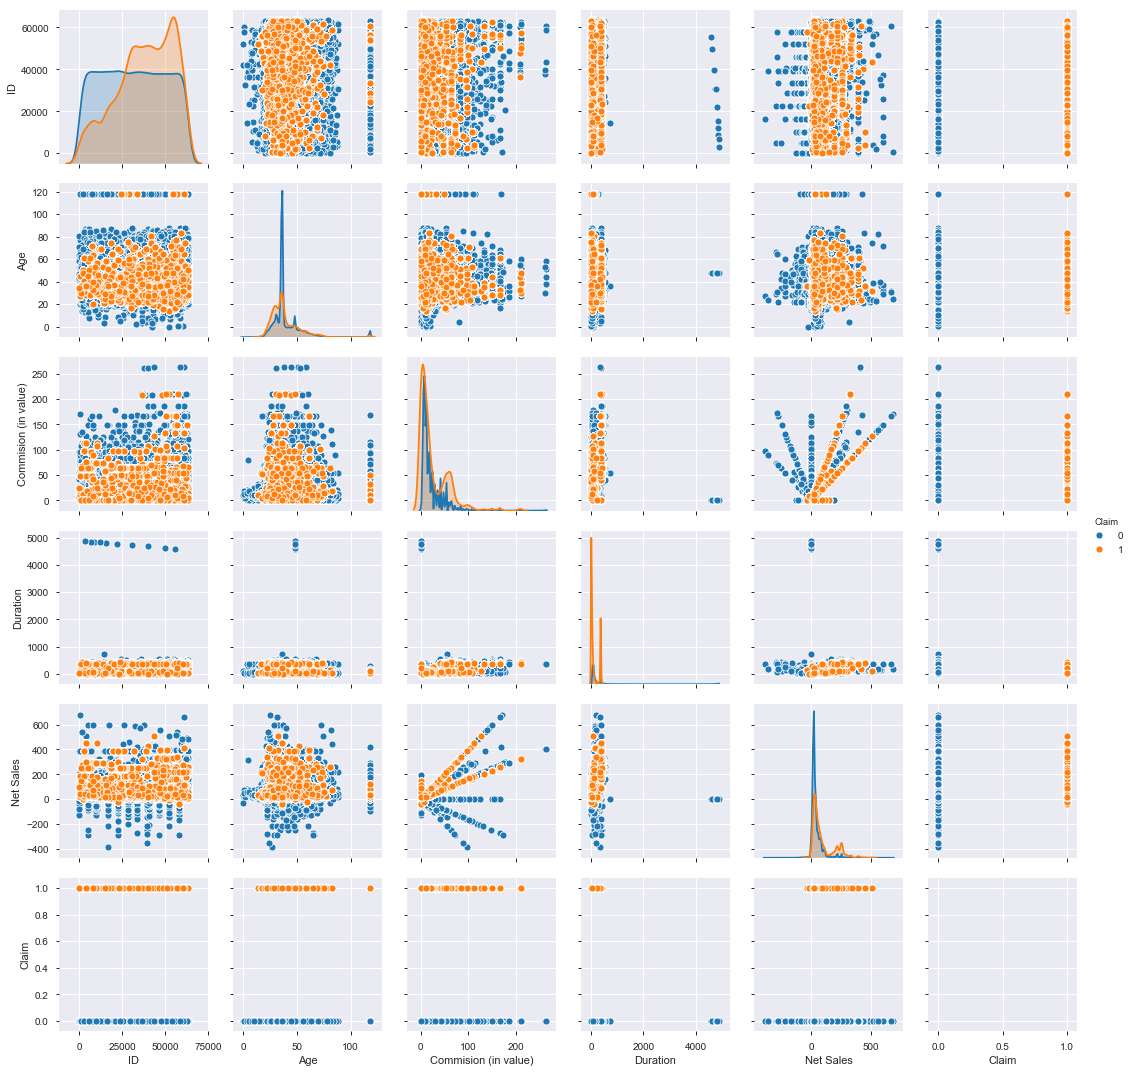

In [79]:
sns.pairplot(df, hue= 'Claim')

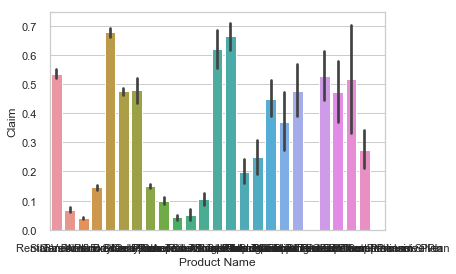

In [209]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Product Name", y="Claim", data=df)

In [287]:
df_Agency_Type =pd.DataFrame(df.groupby(['Agency Type','Claim'])['Claim'].agg('count'))
df_Agency_Type

Claim
Agency Type   Claim       
Airlines      0      13481
              1       7991
Travel Agency 0      36349
              1       4467

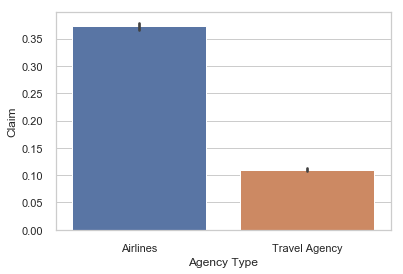

In [334]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Agency Type", y="Claim", data=df)

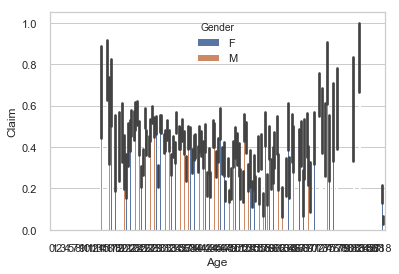

In [96]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Age", y="Claim", hue='Gender', data=df)

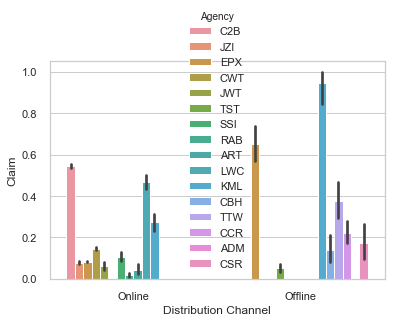

In [336]:
ax = sns.barplot(x="Distribution Channel", y="Claim", hue="Agency", data=df)

In [69]:
df_Dist_C =(df[df['Claim']==1]).groupby(['Destination']).size()
df_Dist_C

Destination
ARGENTINA                             12
AUSTRALIA                            543
BRUNEI DARUSSALAM                     24
CAMBODIA                              19
CANADA                                90
CHINA                                596
COSTA RICA                            12
CZECH REPUBLIC                        28
FINLAND                                9
FRANCE                               114
GERMANY                               50
GREECE                                14
HONG KONG                            209
ICELAND                               33
INDIA                                 88
INDONESIA                            203
ISRAEL                                11
ITALY                                121
JAPAN                                187
KOREA, REPUBLIC OF                   181
LAO PEOPLE'S DEMOCRATIC REPUBLIC      12
MACAO                                 11
MALAYSIA                             314
MYANMAR                               14
NEPA

In [112]:
df_Dest =round(df[df['Claim']==1].groupby(['Destination'])['Claim'].agg('count')/df.groupby("Destination").size()*100)
df_Dest.fillna(0, inplace=True)
df.loc[:,'Dest_Claim_perc'] = df['Destination'].map(df_Dest)
df[df['Destination']=='AUSTRIA']


,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim,Dest_Claim_perc
679,51057,36,EPX,Travel Agency,0.00,AUSTRIA,Online,64,NaN,58.0,Cancellation Plan,0,0.0
1136,52696,36,EPX,Travel Agency,0.00,AUSTRIA,Online,122,NaN,26.0,2 way Comprehensive Plan,0,0.0
1987,58636,35,EPX,Travel Agency,0.00,AUSTRIA,Online,99,NaN,76.0,2 way Comprehensive Plan,0,0.0
2141,46004,43,CWT,Travel Agency,29.70,AUSTRIA,Online,109,NaN,-49.5,Rental Vehicle Excess Insurance,0,0.0
2464,17782,57,CWT,Travel Agency,5.94,AUSTRIA,Online,28,NaN,9.9,Rental Vehicle Excess Insurance,0,0.0
3554,38695,36,EPX,Travel Agency,0.00,AUSTRIA,Online,113,NaN,59.0,2 way Comprehensive Plan,0,0.0
5544,57375,31,CWT,Travel Agency,100.98,AUSTRIA,Online,39,NaN,0.0,Rental Vehicle Excess Insurance,0,0.0
6065,54698,40,LWC,Travel Agency,30.55,AUSTRIA,Online,30,F,47.0,Single Trip Travel Protect Silver,0,0.0
7769,8081,36,EPX,Travel Agency,0.00,AUSTRIA,Online,71,NaN,72.0,Cancellation Plan,0,0.0
8959,33577,43,CWT,Travel Agency,29.70,AUSTRIA,Online,124,NaN,-49.5,Rental Vehicle Excess Insurance,0,0.0


In [58]:
freq_cd = round(df.groupby("Destination").size()/len(df)*100,2)
df.loc[:,'Dest_Freq_cd'] = df['Destination'].map(freq_cd)
df.head(100)

Destination
ARGENTINA                            0.04
AUSTRALIA                            5.59
AUSTRIA                              0.13
AZERBAIJAN                           0.01
BAHRAIN                              0.02
BANGLADESH                           0.12
BELARUS                              0.00
BELGIUM                              0.06
BERMUDA                              0.00
BHUTAN                               0.00
BOLIVIA                              0.01
BRAZIL                               0.04
BRUNEI DARUSSALAM                    1.06
CAMBODIA                             0.68
CANADA                               0.82
CAYMAN ISLANDS                       0.00
CHILE                                0.01
CHINA                                6.98
COLOMBIA                             0.02
COSTA RICA                           0.03
CROATIA                              0.07
CYPRUS                               0.02
CZECH REPUBLIC                       0.13
DENMARK               

In [ ]:
df.groupby("Destination").size()

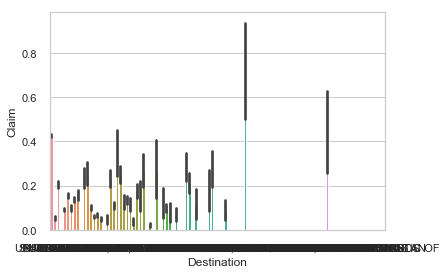

In [350]:
import numpy as np
ax = sns.barplot(x="Destination", y="Claim", data=df)

In [ ]:
df.head()

In [189]:
def feature_eng(df):
    print("Feature Engineering is started...\n")
    df_final =  pd.get_dummies(df, columns=['Product Name'], drop_first=True, prefix=None )
    df_final =  pd.get_dummies(df_final, columns=['Agency Type'], drop_first=True, prefix=None )
    df_final =  pd.get_dummies(df_final, columns=['Distribution Channel'], drop_first=True, prefix=None )
    df_final =  pd.get_dummies(df_final, columns=['Agency'], drop_first=True, prefix=None )
    #df_final['Destination'] = df_final.apply(get_Destination, axis = 1)
    freq_cd = round(df.groupby("Destination").size()/len(df)*100,2)
    df_final.loc[:,'Dest_Freq_cd'] = df_final['Destination'].map(freq_cd)
    #df_final =  pd.get_dummies(df_final, columns=['Destination'], drop_first=True, prefix=None )
    #Dest_Claim_Perc =round(df[df['Claim']==1].groupby(['Destination'])['Claim'].agg('count')/df.groupby("Destination").size()*100)
    #Dest_Claim_Perc.fillna(0, inplace=True)
    #df_final.loc[:,'Dest_Claim_perc'] = df_final['Destination'].map(Dest_Claim_Perc)
    print("Feature Engineering is completed...\n\n")
    df_final.drop(['ID', 'Gender','Destination'], axis=1, inplace=True)
    return df_final

In [190]:
#df_final.drop('Gender', axis=1)  
def Feature_sel(df):
    print("Feature selection is started...\n")
    column_list = list(df.columns)
    print("Feature selection is completed...\n")
    return column_list

In [191]:
claims_df = readTrainData()
claims_Final_df = feature_eng(claims_df)
features = Feature_sel(claims_Final_df)
x = claims_Final_df[features]
x.drop('Claim', axis=1, inplace=True)
y = claims_Final_df['Claim']
x.head()

Reading csv...

Reading csv Completed...


Feature Engineering is started...

Feature Engineering is completed...


Feature selection is started...

Feature selection is completed...



,Age,Commision (in value),Duration,Net Sales,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Agency Type_Travel Agency,Distribution Channel_Online,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Dest_Freq_cd
0,28,28.13,34,112.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,28.57
1,37,12.95,53,37.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.29
2,27,0.00,28,13.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.03
3,36,0.00,1,34.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.08
4,26,23.76,33,39.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8.31


In [192]:
x.shape

(62288, 46)

In [193]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

In [194]:
y_train.value_counts()/y_train.sum()

0    3.972558
1    1.000000
Name: Claim, dtype: float64

In [195]:
y_test.value_counts()/y_test.sum()

0    4.112023
1    1.000000
Name: Claim, dtype: float64

In [204]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print('LR precision:   ', precision_score(y_test, lr_pred))

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print('Decision Tree:  ', precision_score(y_test, dt_pred))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print('knn precision:  ', precision_score(y_test,knn_pred))


rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print('rf precision:  ', precision_score(y_test,rf_pred))
print('rf accuracy:  ', accuracy_score(y_test,rf_pred))
print('rf conf mat:  ', confusion_matrix(y_test,rf_pred))


xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print('xgb precision:  ', precision_score(y_test,xgb_pred))

LR precision:    0.6175710594315246
Decision Tree:   0.9161654135338346
knn precision:   0.9167303284950343
rf precision:   0.9515814135103475
rf accuracy:   0.9900465564296035
rf conf mat:   [[9897  124]
 [   0 2437]]
xgb precision:   0.6362612612612613


In [166]:
for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    print('FOR K VALUE = ', i)
    #print('knn conf mat:  \n', confusion_matrix(y_test,knn_pred))
    #print('knn recall score:  ', recall_score(y_test,knn_pred))
    print('knn precision:  ', precision_score(y_test,knn_pred))
    #print('knn accuracy:  ', accuracy_score(y_test,knn_pred))
    print('knn f measure:  ', f1_score(y_test,knn_pred))
    knn.score

FOR K VALUE =  1
knn precision:   0.916984006092917
knn f measure:   0.9512146948449535
FOR K VALUE =  2
knn precision:   0.9182729375481882
knn f measure:   0.9469290399522957
FOR K VALUE =  3
knn precision:   0.8611898016997167
knn f measure:   0.9245390610150162
FOR K VALUE =  4
knn precision:   0.8614072494669509
knn f measure:   0.9232527137688059
FOR K VALUE =  5
knn precision:   0.8134403209628887
knn f measure:   0.8964627855563744
FOR K VALUE =  6
knn precision:   0.8149143432986228
knn f measure:   0.8961950498707055
FOR K VALUE =  7
knn precision:   0.7755754475703325
knn f measure:   0.8718778077268644
FOR K VALUE =  8
knn precision:   0.7786458333333334
knn f measure:   0.8683971682701035
FOR K VALUE =  9
knn precision:   0.7399629400864731
knn f measure:   0.8444052863436123


In [24]:
print('rf conf mat:  \n', confusion_matrix(y_test,rf_pred))
print('rf recall score:  ', recall_score(y_test,rf_pred))
print('rf precision:  ', precision_score(y_test,rf_pred))
print('rf accuracy:  ', accuracy_score(y_test,rf_pred))
print('rf f measure:  ', f1_score(y_test,rf_pred))
rf.score

rf conf mat:  
 [[9894  138]
 [   0 2426]]
rf recall score:   1.0
rf precision:   0.9461778471138845
rf accuracy:   0.9889227805426232
rf f measure:   0.9723446893787575


<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

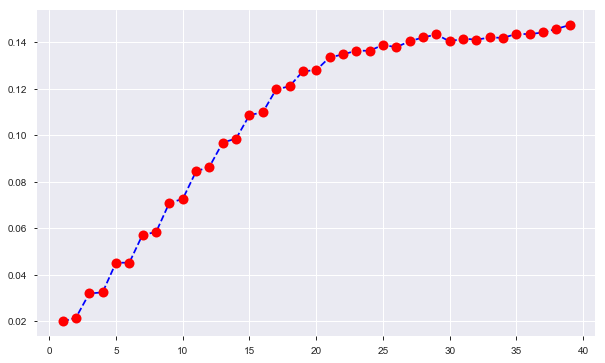

In [167]:

errorRate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_pred_i = knn.predict(x_test)
    errorRate.append(np.mean(knn_pred_i != y_test))    

    
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)


In [ ]:
import matplotlib as plt


In [205]:
new_test = readTestData()

Reading csv...

Reading csv Completed...




In [206]:
new_test_Final = feature_eng(new_test)

Feature Engineering is started...

Feature Engineering is completed...




In [207]:
new_test_Final.shape

(15572, 46)

In [208]:
y_pred = rf.predict(new_test_Final)
Final_Claim = pd.DataFrame(y_pred)
Final_ID =  new_test['ID']
Final_CSV = pd.concat([Final_ID,Final_Claim], ignore_index=True, axis=1)
Final_CSV.columns = ['ID','Claim']
print(Final_CSV)

          ID  Claim
0      26611      0
1      50772      1
2      59472      0
3       5466      0
4      61014      1
5      22144      0
6      60735      1
7      57885      0
8      50175      1
9      51305      0
10      1097      0
11     49728      0
12     63081      0
13      4913      0
14     36776      0
15     34885      0
16     35483      0
17     48554      0
18     10140      0
19      1120      0
20     59834      0
21     18955      0
22      7103      0
23     61986      1
24     18849      0
25     31043      0
26     40572      0
27     14299      0
28     62183      0
29     25870      0
30      7959      1
31     12983      0
32     24265      0
33     60269      1
34     62874      0
35     17384      0
36      3259      0
37     36239      0
38     16685      0
39     28195      0
40     31382      1
41     15220      0
42     59449      0
43     26616      0
44     37646      1
45     24788      0
46      4430      0
47     15295      0
48      8778      0


In [172]:
y_pred = dt.predict(new_test_Final)
Final_Claim = pd.DataFrame(y_pred)
Final_ID =  new_test['ID']
Final_CSV = pd.concat([Final_ID,Final_Claim], ignore_index=True, axis=1)
Final_CSV.columns = ['ID','Claim']
print(Final_CSV)

          ID  Claim
0      26611      0
1      50772      0
2      59472      0
3       5466      0
4      61014      1
5      22144      0
6      60735      1
7      57885      0
8      50175      1
9      51305      0
10      1097      0
11     49728      0
12     63081      0
13      4913      0
14     36776      0
15     34885      0
16     35483      0
17     48554      0
18     10140      0
19      1120      0
20     59834      0
21     18955      0
22      7103      0
23     61986      1
24     18849      0
25     31043      0
26     40572      0
27     14299      0
28     62183      0
29     25870      0
30      7959      1
31     12983      0
32     24265      0
33     60269      0
34     62874      0
35     17384      0
36      3259      1
37     36239      0
38     16685      0
39     28195      0
40     31382      1
41     15220      0
42     59449      0
43     26616      0
44     37646      1
45     24788      0
46      4430      0
47     15295      0
48      8778      0


In [209]:
fileloc = "D:\\Learning\\GreyAtom\\Hackathon 2\\Data\\"
Final_CSV.to_csv(fileloc+'sample_submission.csv', index=False)

In [137]:
from sklearn.neighbors import KNeighborsClassifier


In [173]:
lr_pred = lr.predict(new_test_Final)

dt_pred = dt.predict(new_test_Final)

knn_pred = knn.predict(new_test_Final)

rf_pred = rf.predict(new_test_Final)

xgb_pred = xgb.predict(new_test_Final)


In [174]:
Final_Claim = pd.DataFrame(rf_pred)
Final_ID =  new_test['ID']
Final_CSV = pd.concat([Final_ID,Final_Claim], ignore_index=True, axis=1)
Final_CSV.columns = ['ID','Claim']
print(Final_CSV)

          ID  Claim
0      26611      0
1      50772      0
2      59472      0
3       5466      0
4      61014      1
5      22144      0
6      60735      1
7      57885      0
8      50175      1
9      51305      0
10      1097      0
11     49728      0
12     63081      0
13      4913      0
14     36776      0
15     34885      0
16     35483      0
17     48554      0
18     10140      0
19      1120      0
20     59834      0
21     18955      0
22      7103      0
23     61986      1
24     18849      0
25     31043      0
26     40572      0
27     14299      0
28     62183      0
29     25870      0
30      7959      1
31     12983      0
32     24265      0
33     60269      1
34     62874      0
35     17384      0
36      3259      0
37     36239      0
38     16685      0
39     28195      0
40     31382      1
41     15220      0
42     59449      0
43     26616      0
44     37646      1
45     24788      0
46      4430      0
47     15295      0
48      8778      0


In [143]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [144]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(train_features, train_labels)

In [145]:
rf_random.fit(x_train, y_train)
rf_pred = rf_random.predict(x_test)
print('rf precision:  ', precision_score(y_test,rf_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 64.4min finished


rf precision:   0.9609621451104101


In [53]:
rf_pred = rf_random.predict(new_test_Final)

In [54]:
print(rf_pred)

[0 1 0 ... 0 1 0]


In [28]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [206]:
rf_random.fit_params

# Cross validation Score

In [ ]:
x.head()

In [175]:
knn = KNeighborsClassifier(n_neighbors=2)
print(cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy').mean())

0.9738914353579096


In [200]:
rfcv = RandomForestClassifier()
print(cross_val_score(rfcv, x_train, y_train, cv=10, scoring='accuracy').mean())
rfcv.fit(x_train, y_train)
rf_pred = rfcv.predict(x_test)
print('rf precision:  ', precision_score(y_test,rf_pred))
print('rf accuracy:  ', accuracy_score(y_test,rf_pred))
print('rf conf mat:  ', confusion_matrix(y_test,rf_pred))

0.9878186314171427
rf precision:   0.953816046966732
rf accuracy:   0.9905281746668807
rf conf mat:   [[9903  118]
 [   0 2437]]


In [177]:
logreg = LogisticRegression()
print(cross_val_score(logreg, x_train, y_train, cv=10, scoring='accuracy').mean())

0.8327916025242169


In [178]:
dtcv = DecisionTreeClassifier()
print(cross_val_score(dtcv, x_train, y_train, cv=10, scoring='accuracy').mean())

0.977282761191517


In [179]:
xgbcv = XGBClassifier()
print(cross_val_score(xgbcv, x, y, cv=10, scoring='accuracy').mean())

0.8432282423986341


# using standardization

In [12]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

In [13]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(x_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(x_train_std, y_train)

# Evaluating the classification accuracy with and without standardization

In [14]:
from sklearn import metrics

pred_train = gnb.predict(x_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(x_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
80.96%

Prediction accuracy for the test dataset
80.92%



In [15]:
pred_train_std = gnb_std.predict(x_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(x_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
31.81%

Prediction accuracy for the test dataset
30.80%



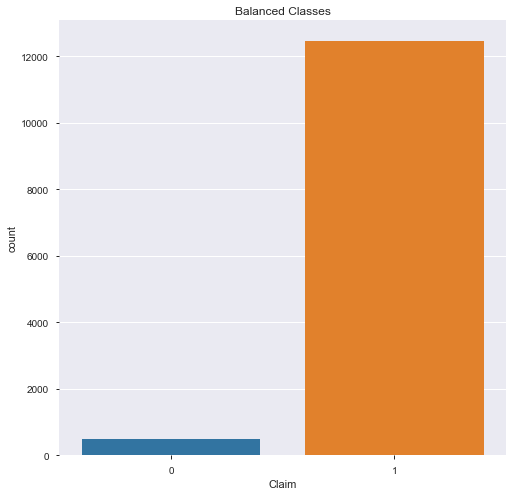

In [16]:
# Shuffle the Dataset.
shuffled_df = claims_Final_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['Claim'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['Claim'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Claim', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [17]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE


# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(x, y)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns

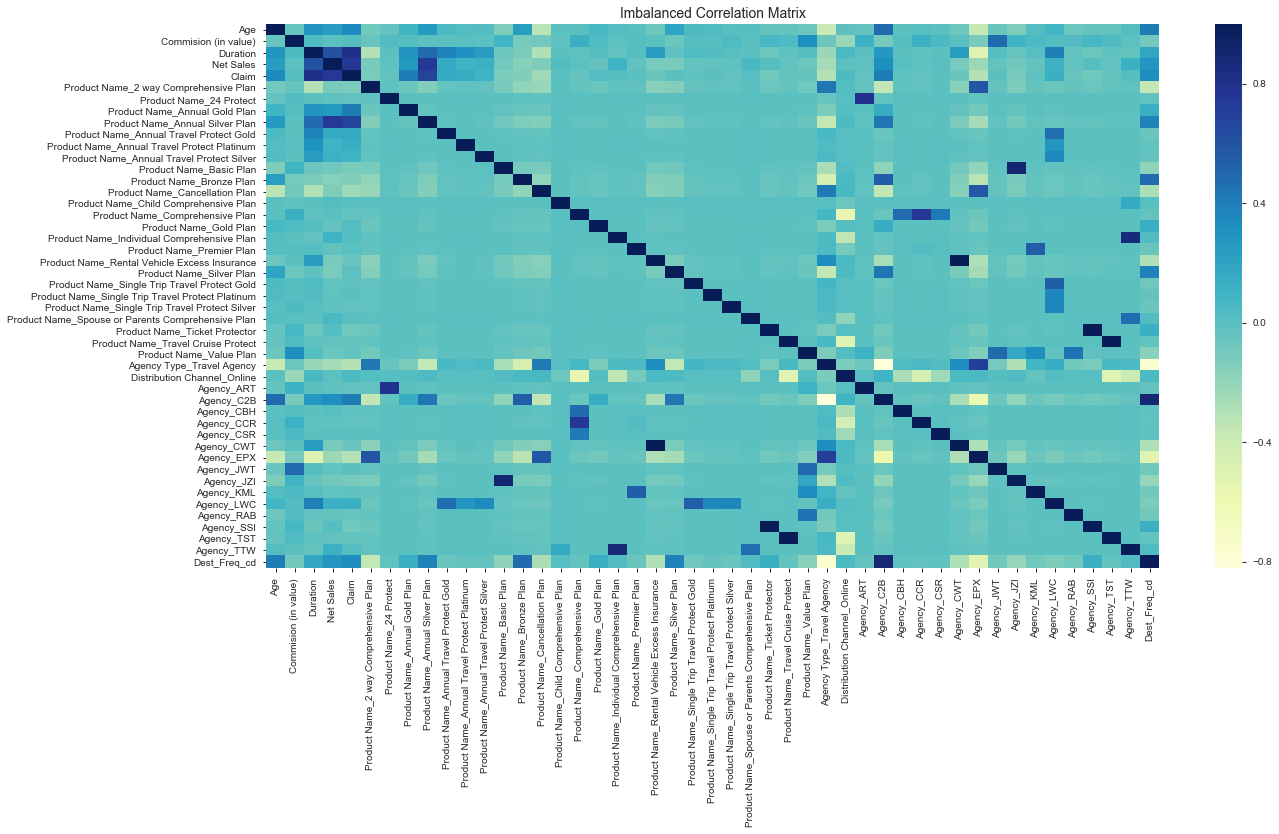

In [19]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

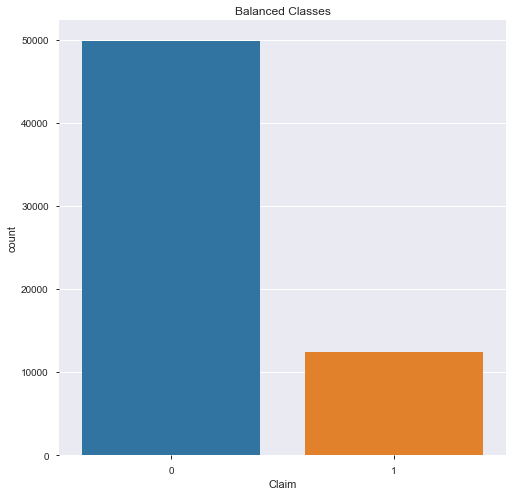

In [21]:
plt.figure(figsize=(8, 8))
sns.countplot('Claim', data=claims_Final_df)
plt.title('Balanced Classes')
plt.show()

# BalancedBaggingClassifier

In [29]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

y_train = claims_Final_df['Claim']
x_train = claims_Final_df.drop(['Claim'], axis=1, inplace=False)

#Train the classifier.
bbc.fit(x_train, y_train)
preds = bbc.predict(x_test)

In [30]:
preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
accuracy_score(y_test, preds)

0.9876384652432172

In [33]:
print('DT balBag conf mat:  \n', confusion_matrix(y_test,preds))
print('DT balBag recall score:  ', recall_score(y_test,preds))
print('DT balBag precision:  ', precision_score(y_test,preds))
print('DT balBag accuracy:  ', accuracy_score(y_test,preds))
print('DT balBag f measure:  ', f1_score(y_test,preds))
bbc.score

DT balBag conf mat:  
 [[9867  154]
 [   0 2437]]
DT balBag recall score:   1.0
DT balBag precision:   0.940563489000386
DT balBag accuracy:   0.9876384652432172
DT balBag f measure:   0.9693715194908512


<bound method ClassifierMixin.score of BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                criterion='gini',
                                                                max_depth=None,
                                                                max_features=None,
                                                                max_leaf_nodes=None,
                                                                min_impurity_decrease=0.0,
                                                                min_impurity_split=None,
                                                                min_samples_leaf=1,
                                                                min_samples_split=2,
                                                                min_weight_fraction_leaf=0.0,
                                                                presort=False,
                          

In [37]:
bbc_pred = bbc.predict(new_test_Final)

In [38]:
Final_Claim = pd.DataFrame(bbc_pred)
Final_ID =  new_test['ID']
Final_CSV = pd.concat([Final_ID,Final_Claim], ignore_index=True, axis=1)
Final_CSV.columns = ['ID','Claim']
print(Final_CSV)

          ID  Claim
0      26611      0
1      50772      0
2      59472      0
3       5466      0
4      61014      1
5      22144      0
6      60735      1
7      57885      0
8      50175      1
9      51305      0
10      1097      0
11     49728      0
12     63081      0
13      4913      0
14     36776      0
15     34885      0
16     35483      0
17     48554      0
18     10140      0
19      1120      0
20     59834      0
21     18955      0
22      7103      0
23     61986      1
24     18849      0
25     31043      0
26     40572      0
27     14299      0
28     62183      0
29     25870      0
30      7959      0
31     12983      0
32     24265      0
33     60269      0
34     62874      0
35     17384      0
36      3259      1
37     36239      0
38     16685      0
39     28195      0
40     31382      1
41     15220      0
42     59449      0
43     26616      0
44     37646      1
45     24788      0
46      4430      0
47     15295      0
48      8778      0


In [39]:
fileloc = "D:\\Learning\\GreyAtom\\Hackathon 2\\Data\\"
Final_CSV.to_csv(fileloc+'sample_bbc_submission.csv', index=False)

# Imbalanced dataset

In [201]:
import sklearn.datasets as ds
x, y = ds.make_classification(n_samples=10000, n_classes=2, weights=[0.55,0.45], random_state=42)
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=2)

NameError: name 'train_test_split' is not defined

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [62]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.833


In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10021
           1       0.61      0.39      0.48      2437

    accuracy                           0.83     12458
   macro avg       0.74      0.66      0.69     12458
weighted avg       0.81      0.83      0.82     12458



In [64]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10021
           1       0.94      1.00      0.97      2437

    accuracy                           0.99     12458
   macro avg       0.97      0.99      0.98     12458
weighted avg       0.99      0.99      0.99     12458



In [200]:
probs = rf_cv.predict_proba(x_test)
probs = probs[:, 1]

NameError: name 'rf_cv' is not defined

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)